In [2]:
library("sleuth")

In [3]:
suppressMessages({
  library("sleuth")
})

In [4]:
elphege_proj_files = "/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652"

In [5]:
sample_id <- dir(file.path(elphege_proj_files,"SRP106652"))

In [6]:
sample_id

[1] "SRR5517500" "SRR5517501" "SRR5517502" "SRR5517503" "SRR5517504"
 [6] "SRR5517505" "SRR5517506" "SRR5517507" "SRR5517508" "SRR5517509"
[11] "SRR5517510" "SRR5517511" "SRR5517512" "SRR5517513" "SRR5517514"
[16] "SRR5517515" "SRR5517516" "SRR5517517" "SRR5517518" "SRR5517519"
[21] "SRR5517520" "SRR5517521" "SRR5517522" "SRR5517523"

In [7]:
kal_dirs <- file.path(elphege_proj_files, "SRP106652", sample_id, "kallisto-mm9")
kal_dirs

[1] "/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/SRP106652/SRR5517500/kallisto-mm9"
 [2] "/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/SRP106652/SRR5517501/kallisto-mm9"
 [3] "/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/SRP106652/SRR5517502/kallisto-mm9"
 [4] "/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/SRP106652/SRR5517503/kallisto-mm9"
 [5] "/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/SRP106652/SRR5517504/kallisto-mm9"
 [6] "/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/SRP106652/SRR5517505/kallisto-mm9"
 [7] "/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/SRP106652/SRR5517506/kallisto-mm9"
 [8] "/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/SRP106652/SRR5517507/kallisto-mm9"
 [9] "/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/SRP106652/SRR5517508/kallisto-mm9"
[10] "/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/SRP106652/SRR5517509/kallisto-mm9"
[11] "/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/SRP106652/SRR5517510/kallisto-mm9"
[12] "/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/SRP106652/SRR5517511/kallisto-mm9"
[13] "/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/SRP106652/SRR5517512/kallisto-mm9"
[14] "/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/SRP106652/SRR5517513/kallisto-mm9"
[15] "/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/SRP106652/SRR5517514/kallisto-mm9"
[16] "/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/SRP106652/SRR5517515/kallisto-mm9"
[17] "/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/SRP106652/SRR5517516/kallisto-mm9"
[18] "/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/SRP106652/SRR5517517/kallisto-mm9"
[19] "/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/SRP106652/SRR5517518/kallisto-mm9"
[20] "/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/SRP106652/SRR5517519/kallisto-mm9"
[21] "/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/SRP106652/SRR5517520/kallisto-mm9"
[22] "/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/SRP106652/SRR5517521/kallisto-mm9"
[23] "/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/SRP106652/SRR5517522/kallisto-mm9"
[24] "/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/SRP106652/SRR5517523/kallisto-mm9"

Need to create sleuth constructor object -- matches the experiment files to the conditions

In [8]:
# Getting "Run" and "condition" from Experiment Name of the SRA deposits

sum <- read.table(file.path(elphege_proj_files, "metadata", "sra_result_summary.csv"), header = TRUE, sep = ",", stringsAsFactors=FALSE)

# Parse experiment name to get 'condition' -- str_split_fixed(string, pattern, n)
sum_extended <- cbind(sum,  stringr::str_split_fixed(sum$Experiment.Title, "[:;]+", 4))
colnames(sum_extended)[19] <- "condition"

# Removing replicate number so that sleuth can do some grouping
sum_extended$condition <- sub("_rep[0-4]", "", sum_extended$condition)
head(sum_extended, 5)

,Experiment.Accession,Experiment.Title,Organism.Name,Instrument,Submitter,Study.Accession,Study.Title,Sample.Accession,Sample.Title,Total.Size..Mb,⋯,Total.Spots,Total.Bases,Library.Name,Library.Strategy,Library.Source,Library.Selection,1,condition,3,4
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,⋯,<int>,<dbl>,<lgl>,<chr>,<chr>,<chr>,<fct>,<chr>,<fct>,<fct>
1,SRX2790892,GSM2609232: RNA-seq_WT-untagged_auxin4days_rep3; Mus musculus; RNA-Seq,Mus musculus,NextSeq 500,GEO,SRP106652,Targeted degradation of CTCF decouples local insulation of chromosome domains from genomic compartmentalization,SRS2172370,NA,2053.02,⋯,37444268,5691528736,NA,RNA-Seq,TRANSCRIPTOMIC,cDNA,GSM2609232,RNA-seq_WT-untagged_auxin4days,Mus musculus,RNA-Seq
2,SRX2790891,GSM2609231: RNA-seq_WT-untagged_auxin2days_rep3; Mus musculus; RNA-Seq,Mus musculus,NextSeq 500,GEO,SRP106652,Targeted degradation of CTCF decouples local insulation of chromosome domains from genomic compartmentalization,SRS2172369,NA,3252.85,⋯,58726186,8926380272,NA,RNA-Seq,TRANSCRIPTOMIC,cDNA,GSM2609231,RNA-seq_WT-untagged_auxin2days,Mus musculus,RNA-Seq
3,SRX2790890,GSM2609230: RNA-seq_WT-untagged_untreated_rep3; Mus musculus; RNA-Seq,Mus musculus,NextSeq 500,GEO,SRP106652,Targeted degradation of CTCF decouples local insulation of chromosome domains from genomic compartmentalization,SRS2172368,NA,5413.41,⋯,98190712,14924988224,NA,RNA-Seq,TRANSCRIPTOMIC,cDNA,GSM2609230,RNA-seq_WT-untagged_untreated,Mus musculus,RNA-Seq
4,SRX2790889,GSM2609229: RNA-seq_WT-untagged_auxin4days_rep2; Mus musculus; RNA-Seq,Mus musculus,NextSeq 500,GEO,SRP106652,Targeted degradation of CTCF decouples local insulation of chromosome domains from genomic compartmentalization,SRS2172367,NA,3291.89,⋯,58686036,8920277472,NA,RNA-Seq,TRANSCRIPTOMIC,cDNA,GSM2609229,RNA-seq_WT-untagged_auxin4days,Mus musculus,RNA-Seq
5,SRX2790888,GSM2609228: RNA-seq_WT-untagged_auxin2days_rep2; Mus musculus; RNA-Seq,Mus musculus,NextSeq 500,GEO,SRP106652,Targeted degradation of CTCF decouples local insulation of chromosome domains from genomic compartmentalization,SRS2172366,NA,2394.52,⋯,38024426,5779712752,NA,RNA-Seq,TRANSCRIPTOMIC,cDNA,GSM2609228,RNA-seq_WT-untagged_auxin2days,Mus musculus,RNA-Seq


In [9]:
runInfo <- read.table(file.path(elphege_proj_files, "metadata", "SraRunInfo.csv"), header = TRUE, sep = ",", stringsAsFactors=FALSE)
head(runInfo, 5)

,Run,ReleaseDate,LoadDate,spots,bases,spots_with_mates,avgLength,size_MB,AssemblyName,download_path,⋯,Affection_Status,Analyte_Type,Histological_Type,Body_Site,CenterName,Submission,dbgap_study_accession,Consent,RunHash,ReadHash
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<lgl>,<chr>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>
1,SRR5517500,2017-05-26 10:16:21,2017-05-08 17:35:25,28656716,4355820832,28656716,152,1603,NA,https://sra-downloadb.st-va.ncbi.nlm.nih.gov/sos1/sra-pub-run-8/SRR5517500/SRR5517500.1,⋯,NA,NA,NA,NA,GEO,SRA560605,NA,public,F81677DDDD471559B2F07AE966817AAF,7C8A3510A0405D532E497E49E19F67B9
2,SRR5517501,2017-05-26 10:16:21,2017-05-08 17:35:57,30176838,4586879376,30176838,152,1672,NA,https://sra-downloadb.st-va.ncbi.nlm.nih.gov/sos1/sra-pub-run-8/SRR5517501/SRR5517501.1,⋯,NA,NA,NA,NA,GEO,SRA560605,NA,public,B8469693637BD9B86CA631EDC8C3F149,850B6F66A9C3670E4D7A9D42ECEA8FDE
3,SRR5517502,2017-05-26 10:16:21,2017-05-08 17:55:26,41274152,6273671104,41274152,152,2310,NA,https://sra-downloadb.st-va.ncbi.nlm.nih.gov/sos1/sra-pub-run-8/SRR5517502/SRR5517502.1,⋯,NA,NA,NA,NA,GEO,SRA560605,NA,public,1EAA03FB52CABD86B77EDC88F938701C,AE5EA653D9F5031ABE66E27ABAEC2773
4,SRR5517503,2017-05-26 10:16:21,2017-05-08 17:39:08,28848858,4385026416,28848858,152,1603,NA,https://sra-downloadb.st-va.ncbi.nlm.nih.gov/sos1/sra-pub-run-8/SRR5517503/SRR5517503.1,⋯,NA,NA,NA,NA,GEO,SRA560605,NA,public,EC245424F964BB5621856DA6FCFB0ED2,264A772C22561DD1B389FC115F2767ED
5,SRR5517504,2017-05-26 10:16:21,2017-05-08 17:36:17,28605084,4347972768,28605084,152,1589,NA,https://sra-downloadb.st-va.ncbi.nlm.nih.gov/sos1/sra-pub-run-8/SRR5517504/SRR5517504.1,⋯,NA,NA,NA,NA,GEO,SRA560605,NA,public,238EDD94BDDEDACD0D2D51FAF7FE86AD,E9D992BB7AA74585B2AE37AF7953ED12


In [10]:
# merge sra_result file and sraRunInfo to get the condition (buried in 'Experiment Name' in sra_result_summary -- put in 'condition')

# runInfo.Experiment
# sum_extended.Experiment.Accession

# merge(authors, books, by.x=c("FirstName", "LastName"),
#       by.y=c("AuthorFirstName", "AuthorLastName"),
#       all.x=TRUE)

total <- merge(runInfo, sum_extended, by.x=c("Experiment"),
      by.y=c("Experiment.Accession"),
      all.x=TRUE)

library(dplyr)

s2c <- select(total, Experiment, Run, condition, Library.Strategy, Library.Selection)
s2c <- dplyr::select(s2c, sample = Run, condition)

# getting rid of whitespace 
s2c %>%
  mutate(across(where(is.character), stringr::str_trim))

s2c



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




sample,condition
<chr>,<chr>
SRR5517500,RNA-seq_CTCF-AID_untreated
SRR5517501,RNA-seq_CTCF-AID_auxin1day
SRR5517502,RNA-seq_CTCF-AID_auxin2days
SRR5517503,RNA-seq_CTCF-AID_auxin4days
SRR5517504,RNA-seq_CTCF-AID_washoff2days
SRR5517505,RNA-seq_CTCF-AID_untreated
SRR5517506,RNA-seq_CTCF-AID_auxin1day
SRR5517507,RNA-seq_CTCF-AID_auxin2days
SRR5517508,RNA-seq_CTCF-AID_auxin4days


sample,condition
<chr>,<chr>
SRR5517500,RNA-seq_CTCF-AID_untreated
SRR5517501,RNA-seq_CTCF-AID_auxin1day
SRR5517502,RNA-seq_CTCF-AID_auxin2days
SRR5517503,RNA-seq_CTCF-AID_auxin4days
SRR5517504,RNA-seq_CTCF-AID_washoff2days
SRR5517505,RNA-seq_CTCF-AID_untreated
SRR5517506,RNA-seq_CTCF-AID_auxin1day
SRR5517507,RNA-seq_CTCF-AID_auxin2days
SRR5517508,RNA-seq_CTCF-AID_auxin4days


In [11]:
s2c$condition = as.factor(s2c$condition)

levels(s2c$condition)

[1] " RNA-seq_CTCF-AID_auxin1day"     " RNA-seq_CTCF-AID_auxin2days"   
[3] " RNA-seq_CTCF-AID_auxin4days"    " RNA-seq_CTCF-AID_untreated"    
[5] " RNA-seq_CTCF-AID_washoff2days"  " RNA-seq_WT-untagged_auxin2days"
[7] " RNA-seq_WT-untagged_auxin4days" " RNA-seq_WT-untagged_untreated"

In [12]:
# Getting rid of whitespace didn't work? so just going to try to se the base level
s2c$condition <- relevel(s2c$condition, ref = " RNA-seq_CTCF-AID_untreated")
levels(s2c$condition)
s2c

[1] " RNA-seq_CTCF-AID_untreated"     " RNA-seq_CTCF-AID_auxin1day"    
[3] " RNA-seq_CTCF-AID_auxin2days"    " RNA-seq_CTCF-AID_auxin4days"   
[5] " RNA-seq_CTCF-AID_washoff2days"  " RNA-seq_WT-untagged_auxin2days"
[7] " RNA-seq_WT-untagged_auxin4days" " RNA-seq_WT-untagged_untreated"

sample,condition
<chr>,<fct>
SRR5517500,RNA-seq_CTCF-AID_untreated
SRR5517501,RNA-seq_CTCF-AID_auxin1day
SRR5517502,RNA-seq_CTCF-AID_auxin2days
SRR5517503,RNA-seq_CTCF-AID_auxin4days
SRR5517504,RNA-seq_CTCF-AID_washoff2days
SRR5517505,RNA-seq_CTCF-AID_untreated
SRR5517506,RNA-seq_CTCF-AID_auxin1day
SRR5517507,RNA-seq_CTCF-AID_auxin2days
SRR5517508,RNA-seq_CTCF-AID_auxin4days


In [13]:
s2c <- dplyr::mutate(s2c, path = kal_dirs)

In [14]:
print(s2c)

       sample                       condition
1  SRR5517500      RNA-seq_CTCF-AID_untreated
2  SRR5517501      RNA-seq_CTCF-AID_auxin1day
3  SRR5517502     RNA-seq_CTCF-AID_auxin2days
4  SRR5517503     RNA-seq_CTCF-AID_auxin4days
5  SRR5517504   RNA-seq_CTCF-AID_washoff2days
6  SRR5517505      RNA-seq_CTCF-AID_untreated
7  SRR5517506      RNA-seq_CTCF-AID_auxin1day
8  SRR5517507     RNA-seq_CTCF-AID_auxin2days
9  SRR5517508     RNA-seq_CTCF-AID_auxin4days
10 SRR5517509   RNA-seq_CTCF-AID_washoff2days
11 SRR5517510      RNA-seq_CTCF-AID_untreated
12 SRR5517511      RNA-seq_CTCF-AID_auxin1day
13 SRR5517512     RNA-seq_CTCF-AID_auxin2days
14 SRR5517513     RNA-seq_CTCF-AID_auxin4days
15 SRR5517514   RNA-seq_CTCF-AID_washoff2days
16 SRR5517515   RNA-seq_WT-untagged_untreated
17 SRR5517516  RNA-seq_WT-untagged_auxin2days
18 SRR5517517  RNA-seq_WT-untagged_auxin4days
19 SRR5517518   RNA-seq_WT-untagged_untreated
20 SRR5517519  RNA-seq_WT-untagged_auxin2days
21 SRR5517520  RNA-seq_WT-untagged

Looks good

Lot's of this prep is what goes into describing the variables and the experimental design. For now, choosing the simplest method (only mapping conditions as described by CTCF-AID_ / WT + number of days. But, I think we can group the replicates with aggregation_column (I think?) https://pachterlab.github.io/sleuth/docs/sleuth_prep.html  

# Simplest Wald test

In [15]:
# todo: for log2 change in wald test, add transformation_function = function(x) log2(x + 0.5) 
## from : https://hbctraining.github.io/DGE_workshop_salmon/lessons/09_sleuth.html

so <- sleuth_prep(s2c,
                  extra_bootstrap_summary = TRUE, 
                  read_bootstrap_tpm=TRUE, 
                  transformation_function = function(x) log2(x + 0.5))

reading in kallisto results

dropping unused factor levels

.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


normalizing est_counts

48055 targets passed the filter

normalizing tpm

merging in metadata

summarizing bootstraps





In [16]:
so <- sleuth_fit(so, ~condition, 'full')

fitting measurement error models

shrinkage estimation

1 NA values were found during variance shrinkage estimation due to mean observation values outside of the range used for the LOESS fit.
The LOESS fit will be repeated using exact computation of the fitted surface to extrapolate the missing values.
These are the target ids with NA values: ENSMUST00000049324

computing variance of betas



In [17]:
so <- sleuth_fit(so, ~1, 'reduced')

fitting measurement error models

shrinkage estimation

computing variance of betas



In [18]:
models(so)

[  full  ]
formula:  ~condition 
data modeled:  obs_counts 
transform sync'ed:  TRUE 
coefficients:
	(Intercept)
 	condition RNA-seq_CTCF-AID_auxin1day
 	condition RNA-seq_CTCF-AID_auxin2days
 	condition RNA-seq_CTCF-AID_auxin4days
 	condition RNA-seq_CTCF-AID_washoff2days
 	condition RNA-seq_WT-untagged_auxin2days
 	condition RNA-seq_WT-untagged_auxin4days
 	condition RNA-seq_WT-untagged_untreated
[  reduced  ]
formula:  ~1 
data modeled:  obs_counts 
transform sync'ed:  TRUE 
coefficients:
	(Intercept)


### Apply likelihood ratio test

In the typical Sleuth's workflow, the likelihood ratio test (LRT) is applied. Briefly, the LRT models the likelihood of the data given 2 models:

full: transcript abundance affected on one or more dependent variables (here just being treated or not)
reduced: transcript abundance unaffected by the treatment (null hypothesis)

`sleuth_lrt(obj, null_model, alt_model)`
compute the likelihood ratio test for 2 models. this requires that the null model be nested in the alternate model

--> null is 'reduced', alt is 'full'

 - sleuth docs appear to recommend sleuth_lrt and sleuth_wt for hypothesis testing

In [19]:
# perform a test
so <- sleuth_lrt(so, 'reduced', 'full')

In [20]:
models(so)

[  full  ]
formula:  ~condition 
data modeled:  obs_counts 
transform sync'ed:  TRUE 
coefficients:
	(Intercept)
 	condition RNA-seq_CTCF-AID_auxin1day
 	condition RNA-seq_CTCF-AID_auxin2days
 	condition RNA-seq_CTCF-AID_auxin4days
 	condition RNA-seq_CTCF-AID_washoff2days
 	condition RNA-seq_WT-untagged_auxin2days
 	condition RNA-seq_WT-untagged_auxin4days
 	condition RNA-seq_WT-untagged_untreated
[  reduced  ]
formula:  ~1 
data modeled:  obs_counts 
transform sync'ed:  TRUE 
coefficients:
	(Intercept)


### Examine the results of the above test

Note that these are using the correct base condition -- so every other condition is being compared to RNA-seq_CTCF-AID_untreated

more info on options: https://www.rdocumentation.org/packages/sleuth/versions/0.30.0/topics/sleuth_results 

In [21]:
# Getting results of test -- from pachterlab tutorial

sleuth_table <- sleuth_results(so, 'reduced:full', 'lrt', show_all = TRUE)
sleuth_significant <- dplyr::filter(sleuth_table, qval <= 0.05)
head(sleuth_significant, 20)

,target_id,pval,qval,test_stat,rss,degrees_free,mean_obs,var_obs,tech_var,sigma_sq,smooth_sigma_sq,final_sigma_sq
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSMUST00000029644,3.047563e-14,1.464506e-09,78.30769,22.208030,7,6.862515,0.9655665,0.0029059542,0.9626605,0.09593575,0.9626605
2,ENSMUST00000102763,1.079232e-13,2.593125e-09,75.60788,16.367575,7,7.556659,0.7116337,0.0008762691,0.7107574,0.07613686,0.7107574
3,ENSMUST00000006451,3.690048e-13,4.026421e-09,72.97684,20.415453,7,7.017841,0.8876284,0.0033801130,0.8842483,0.09048501,0.8842483
4,ENSMUST00000155572,4.189388e-13,4.026421e-09,72.70486,16.652961,7,8.060573,0.7240418,0.0004519891,0.7235898,0.06742466,0.7235898
5,ENSMUST00000078953,4.004208e-13,4.026421e-09,72.80175,44.937222,7,5.188072,1.9537923,0.0177739637,1.9360183,0.21619344,1.9360183
6,ENSMUST00000168900,6.272445e-13,5.023706e-09,71.83944,20.212557,7,7.059538,0.8788068,0.0019773653,0.8768295,0.08914646,0.8768295
7,ENSMUST00000171066,1.212480e-12,8.255836e-09,70.42464,24.015087,7,9.518412,1.0441342,0.0001302209,1.0440040,0.06076378,1.0440040
8,ENSMUST00000136299,1.374398e-12,8.255836e-09,70.15534,26.363584,7,8.066746,1.1462428,0.0004998462,1.1457429,0.06734164,1.1457429
9,ENSMUST00000014892,2.382672e-12,1.272214e-08,68.97237,15.942756,7,6.670008,0.6931633,0.0027184562,0.6904448,0.10375566,0.6904448


Checking how many significant DE genes (transcripts)

In [22]:
dim(sleuth_table)
dim(sleuth_significant)

[1] 88366    12

[1] 1018   12

In [23]:
1018/48055

[1] 0.02118406

The significant genes do not appear to have changed with this test, now using the correct base case. Understanding the LRT better now, this makes sense since there is not a comparison to RNA-seq_CTCF-AID_untreated happening at this stage.

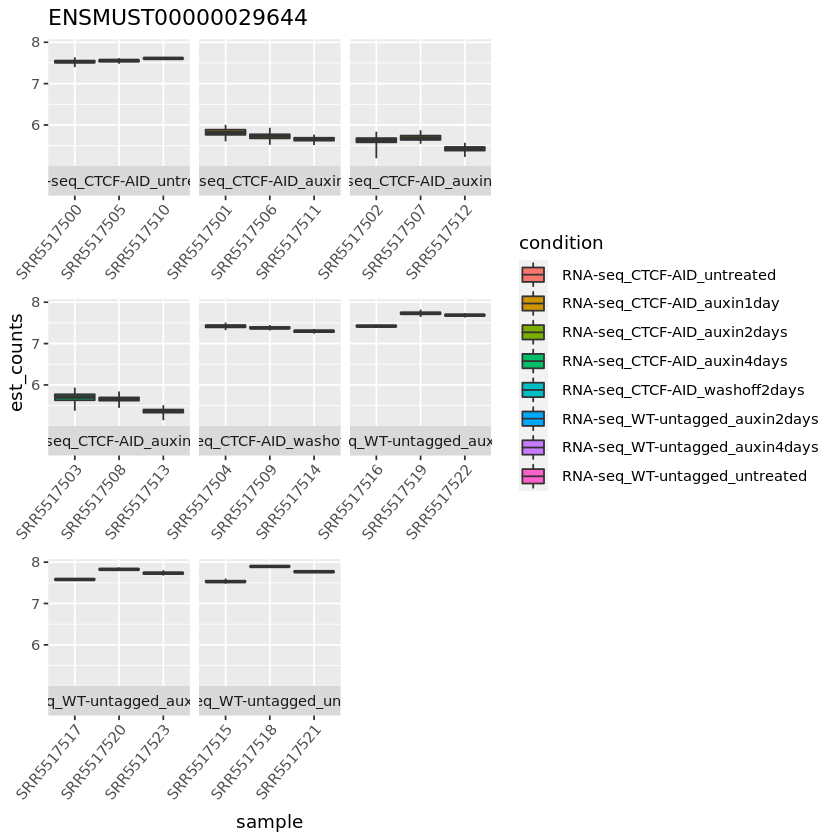

In [24]:
plot_bootstrap(so, "ENSMUST00000029644", units = "est_counts", color_by = "condition")

## Wald Test for each individual conditions

Specify which_beta = the condition that we want to compare against the base level. 

Going to use 2-days auxin treatment at first and do some analysis, but will want to add a test fo reach of the conditions we're looking into here. 


sleuth_wt: Wald test for a sleuth model

`sleuth_wt(obj, which_beta, which_model = "full")`
* computes the Wald test on one specific 'beta' coefficient on every transcript.
* WT is used becase it generates the beta statistic, which approximates to the log2 fold change in expression between the 2 condition tested
* sleuth does not 


In [25]:
models(so)

[  full  ]
formula:  ~condition 
data modeled:  obs_counts 
transform sync'ed:  TRUE 
coefficients:
	(Intercept)
 	condition RNA-seq_CTCF-AID_auxin1day
 	condition RNA-seq_CTCF-AID_auxin2days
 	condition RNA-seq_CTCF-AID_auxin4days
 	condition RNA-seq_CTCF-AID_washoff2days
 	condition RNA-seq_WT-untagged_auxin2days
 	condition RNA-seq_WT-untagged_auxin4days
 	condition RNA-seq_WT-untagged_untreated
[  reduced  ]
formula:  ~1 
data modeled:  obs_counts 
transform sync'ed:  TRUE 
coefficients:
	(Intercept)


In [26]:
# specify which_beta = the condition that we want to compare against. Use 2-days auxin treatment for now 
so <- sleuth_wt(so, which_beta = 'condition RNA-seq_CTCF-AID_auxin1day')

In [27]:
sleuth_results_wt <- sleuth_results(so, 
                                    test = 'condition RNA-seq_CTCF-AID_auxin1day', 
                                    show_all = TRUE)

In [28]:
head(sleuth_results_wt, 10)
dim(sleuth_results_wt)

,target_id,pval,qval,b,se_b,mean_obs,var_obs,tech_var,sigma_sq,smooth_sigma_sq,final_sigma_sq
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSMUST00000168900,2.872365e-17,1.380315e-12,-1.905176,0.2254208,7.059538,0.8788068,0.0019773653,0.04489230,0.07424445,0.07424445
2,ENSMUST00000006451,1.002711e-15,1.606176e-11,-1.839779,0.2292124,7.017841,0.8876284,0.0033801130,0.03671444,0.07542735,0.07542735
3,ENSMUST00000102763,6.894337e-16,1.606176e-11,-1.662413,0.2059385,7.556659,0.7116337,0.0008762691,0.02037499,0.06273970,0.06273970
4,ENSMUST00000029644,1.007347e-14,1.210202e-10,-1.821647,0.2354059,6.862515,0.9655665,0.0029059542,0.01553460,0.08021792,0.08021792
5,ENSMUST00000108830,1.827492e-13,1.756403e-09,-6.382005,0.8670207,3.389990,8.9131355,0.2951307665,0.83245665,0.57447928,0.83245665
6,ENSMUST00000032747,1.137684e-12,9.111900e-09,-3.597136,0.5057319,4.413944,2.6447887,0.0796148464,0.02296489,0.30403235,0.30403235
7,ENSMUST00000078953,6.639283e-12,4.557868e-08,-2.554509,0.3720947,5.188072,1.9537923,0.0177739637,0.03407843,0.18990770,0.18990770
8,ENSMUST00000014892,8.574306e-12,4.819460e-08,-1.670568,0.2446426,6.670008,0.6931633,0.0027184562,0.01457809,0.08705654,0.08705654
9,ENSMUST00000034097,9.885852e-12,4.819460e-08,-1.238389,0.1818979,8.730232,0.4182998,0.0002998160,0.03687634,0.04933048,0.04933048


[1] 88366    11

Note:

The output represents the results from the differential expression testing with the following columns:

- target_id: the Ensembl transcript ID
- pval: the Wald test FDR adjusted pvalue using Benjamini-Hochberg
- qval: the p-value adjusted for multiple test correction
- b: beta value, which is the log2 fold changes between conditions (These are log2 b/c we specified log2 transformation in the sleuth_prep() step. By default, these would have been natural log fold changes).
- se_b: standard error of the beta value
- mean_obs: the mean expression (log2) of the transcript across all samples
- var_obs: the biological variance of the expression
- tech_var: the technical variance of expression (derived from the bootstraps)
- sigma_sq: raw estimator of the variance once the technical variance has been removed
- smooth_sigma_sq: the smooth regression fit for the shrinkage estimation
- final_sigma_sq: max(sigma_sq, smooth_sigma_sq). this is the one used for covariance estimation of beta (in addition to tech_var)
- ens_gene: associated Ensembl gene ID
- ext_gene: associated gene symbol

In [29]:
sig_transcripts <- sleuth_results_wt %>% 
  filter(qval < 0.05)

sig_transcripts
dim(sig_transcripts)

target_id,pval,qval,b,se_b,mean_obs,var_obs,tech_var,sigma_sq,smooth_sigma_sq,final_sigma_sq
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUST00000168900,2.872365e-17,1.380315e-12,-1.905176,0.2254208,7.059538,0.8788068,0.0019773653,0.044892297,0.07424445,0.07424445
ENSMUST00000006451,1.002711e-15,1.606176e-11,-1.839779,0.2292124,7.017841,0.8876284,0.0033801130,0.036714444,0.07542735,0.07542735
ENSMUST00000102763,6.894337e-16,1.606176e-11,-1.662413,0.2059385,7.556659,0.7116337,0.0008762691,0.020374987,0.06273970,0.06273970
ENSMUST00000029644,1.007347e-14,1.210202e-10,-1.821647,0.2354059,6.862515,0.9655665,0.0029059542,0.015534599,0.08021792,0.08021792
ENSMUST00000108830,1.827492e-13,1.756403e-09,-6.382005,0.8670207,3.389990,8.9131355,0.2951307665,0.832456651,0.57447928,0.83245665
ENSMUST00000032747,1.137684e-12,9.111900e-09,-3.597136,0.5057319,4.413944,2.6447887,0.0796148464,0.022964890,0.30403235,0.30403235
ENSMUST00000078953,6.639283e-12,4.557868e-08,-2.554509,0.3720947,5.188072,1.9537923,0.0177739637,0.034078426,0.18990770,0.18990770
ENSMUST00000014892,8.574306e-12,4.819460e-08,-1.670568,0.2446426,6.670008,0.6931633,0.0027184562,0.014578095,0.08705654,0.08705654
ENSMUST00000034097,9.885852e-12,4.819460e-08,-1.238389,0.1818979,8.730232,0.4182998,0.0002998160,0.036876336,0.04933048,0.04933048


[1] 76 11

Waay more significant transcripts are appearing now. :D

In [30]:
models(so)

[  full  ]
formula:  ~condition 
data modeled:  obs_counts 
transform sync'ed:  TRUE 
coefficients:
	(Intercept)
 	condition RNA-seq_CTCF-AID_auxin1day
 	condition RNA-seq_CTCF-AID_auxin2days
 	condition RNA-seq_CTCF-AID_auxin4days
 	condition RNA-seq_CTCF-AID_washoff2days
 	condition RNA-seq_WT-untagged_auxin2days
 	condition RNA-seq_WT-untagged_auxin4days
 	condition RNA-seq_WT-untagged_untreated
[  reduced  ]
formula:  ~1 
data modeled:  obs_counts 
transform sync'ed:  TRUE 
coefficients:
	(Intercept)


In [43]:
for(cond in levels(s2c$condition)) {
    if (cond != levels(s2c$condition)[1]) {
        
        so <- sleuth_wt(so, which_beta = paste("condition",cond, sep=""))
        res <- sleuth_results(so, test = paste("condition",cond, sep=""), show_all = TRUE)
        colnames(res) <- paste(colnames(res),cond,sep="_")
        
        # first, initialize new wt if this is a new set
        if(cond == levels(s2c$condition)[2]) {
            sleuth_results_wt <- res
            
            
        } else {
            sleuth_results_wt <- merge(sleuth_results_wt, res, 
                                       by.x = colnames(sleuth_results_wt)[1], 
                                       by.y = colnames(res)[1],
                                       all.x = TRUE,
                                       all.y = TRUE)        }
        
    }
}


In [44]:
head(sleuth_results_wt, 10)

,target_id_ RNA-seq_CTCF-AID_auxin1day,pval_ RNA-seq_CTCF-AID_auxin1day,qval_ RNA-seq_CTCF-AID_auxin1day,b_ RNA-seq_CTCF-AID_auxin1day,se_b_ RNA-seq_CTCF-AID_auxin1day,mean_obs_ RNA-seq_CTCF-AID_auxin1day,var_obs_ RNA-seq_CTCF-AID_auxin1day,tech_var_ RNA-seq_CTCF-AID_auxin1day,sigma_sq_ RNA-seq_CTCF-AID_auxin1day,smooth_sigma_sq_ RNA-seq_CTCF-AID_auxin1day,⋯,pval_ RNA-seq_WT-untagged_untreated,qval_ RNA-seq_WT-untagged_untreated,b_ RNA-seq_WT-untagged_untreated,se_b_ RNA-seq_WT-untagged_untreated,mean_obs_ RNA-seq_WT-untagged_untreated,var_obs_ RNA-seq_WT-untagged_untreated,tech_var_ RNA-seq_WT-untagged_untreated,sigma_sq_ RNA-seq_WT-untagged_untreated,smooth_sigma_sq_ RNA-seq_WT-untagged_untreated,final_sigma_sq_ RNA-seq_WT-untagged_untreated
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSMUST00000000001,0.90570544,1,-0.02358943,0.1991389,8.655712,0.05682316,0.0002441731,0.05924031,0.04972905,⋯,0.3342214,0.9999711,0.19229770,0.1991389,8.655712,0.05682316,0.0002441731,0.05924031,0.04972905,0.05924031
2,ENSMUST00000000003,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,ENSMUST00000000010,0.69830588,1,0.17765065,0.4583251,4.440927,0.21211535,0.0162280842,0.04600689,0.29886479,⋯,0.9224850,0.9999711,0.04459684,0.4583251,4.440927,0.21211535,0.0162280842,0.04600689,0.29886479,0.29886479
4,ENSMUST00000000028,0.82872248,1,-0.06157805,0.2846351,7.438187,0.10001307,0.0035042013,0.11802149,0.06509591,⋯,0.9303832,0.9999711,-0.02486648,0.2846351,7.438187,0.10001307,0.0035042013,0.11802149,0.06509591,0.11802149
5,ENSMUST00000000033,0.81134715,1,0.44495424,1.8641630,5.160701,5.72203955,0.1502120944,5.06244356,0.19303283,⋯,0.1642919,0.9999711,2.59264235,1.8641630,5.160701,5.72203955,0.1502120944,5.06244356,0.19303283,5.06244356
6,ENSMUST00000000049,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,ENSMUST00000000058,0.31520065,1,0.69674296,0.6937119,3.232592,0.54340358,0.0941986064,0.15236334,0.62765575,⋯,0.5007491,0.9999711,0.46708430,0.6937119,3.232592,0.54340358,0.0941986064,0.15236334,0.62765575,0.62765575
8,ENSMUST00000000080,0.42479111,1,0.16026022,0.2007929,7.715875,0.12819970,0.0005670555,0.02684092,0.05990964,⋯,0.8013308,0.9999711,0.05052456,0.2007929,7.715875,0.12819970,0.0005670555,0.02684092,0.05990964,0.05990964
9,ENSMUST00000000087,0.02262465,1,-1.71229310,0.7510999,5.649420,0.84976153,0.3739270014,0.47229967,0.14522988,⋯,0.3758461,0.9999711,-0.66515607,0.7510999,5.649420,0.84976153,0.3739270014,0.47229967,0.14522988,0.47229967


In [40]:
colnames(sleuth_results_wt)

[1] "target_id_ RNA-seq_CTCF-AID_auxin1day"          
 [2] "pval_ RNA-seq_CTCF-AID_auxin1day"               
 [3] "qval_ RNA-seq_CTCF-AID_auxin1day"               
 [4] "b_ RNA-seq_CTCF-AID_auxin1day"                  
 [5] "se_b_ RNA-seq_CTCF-AID_auxin1day"               
 [6] "mean_obs_ RNA-seq_CTCF-AID_auxin1day"           
 [7] "var_obs_ RNA-seq_CTCF-AID_auxin1day"            
 [8] "tech_var_ RNA-seq_CTCF-AID_auxin1day"           
 [9] "sigma_sq_ RNA-seq_CTCF-AID_auxin1day"           
[10] "smooth_sigma_sq_ RNA-seq_CTCF-AID_auxin1day"    
[11] "final_sigma_sq_ RNA-seq_CTCF-AID_auxin1day"     
[12] "pval_ RNA-seq_CTCF-AID_auxin2days"              
[13] "qval_ RNA-seq_CTCF-AID_auxin2days"              
[14] "b_ RNA-seq_CTCF-AID_auxin2days"                 
[15] "se_b_ RNA-seq_CTCF-AID_auxin2days"              
[16] "mean_obs_ RNA-seq_CTCF-AID_auxin2days"          
[17] "var_obs_ RNA-seq_CTCF-AID_auxin2days"           
[18] "tech_var_ RNA-seq_CTCF-AID_auxin2days"          
[19] "sigma_sq_ RNA-seq_CTCF-AID_auxin2days"          
[20] "smooth_sigma_sq_ RNA-seq_CTCF-AID_auxin2days"   
[21] "final_sigma_sq_ RNA-seq_CTCF-AID_auxin2days"    
[22] "pval_ RNA-seq_CTCF-AID_auxin4days"              
[23] "qval_ RNA-seq_CTCF-AID_auxin4days"              
[24] "b_ RNA-seq_CTCF-AID_auxin4days"                 
[25] "se_b_ RNA-seq_CTCF-AID_auxin4days"              
[26] "mean_obs_ RNA-seq_CTCF-AID_auxin4days"          
[27] "var_obs_ RNA-seq_CTCF-AID_auxin4days"           
[28] "tech_var_ RNA-seq_CTCF-AID_auxin4days"          
[29] "sigma_sq_ RNA-seq_CTCF-AID_auxin4days"          
[30] "smooth_sigma_sq_ RNA-seq_CTCF-AID_auxin4days"   
[31] "final_sigma_sq_ RNA-seq_CTCF-AID_auxin4days"    
[32] "pval_ RNA-seq_CTCF-AID_washoff2days"            
[33] "qval_ RNA-seq_CTCF-AID_washoff2days"            
[34] "b_ RNA-seq_CTCF-AID_washoff2days"               
[35] "se_b_ RNA-seq_CTCF-AID_washoff2days"            
[36] "mean_obs_ RNA-seq_CTCF-AID_washoff2days"        
[37] "var_obs_ RNA-seq_CTCF-AID_washoff2days"         
[38] "tech_var_ RNA-seq_CTCF-AID_washoff2days"        
[39] "sigma_sq_ RNA-seq_CTCF-AID_washoff2days"        
[40] "smooth_sigma_sq_ RNA-seq_CTCF-AID_washoff2days" 
[41] "final_sigma_sq_ RNA-seq_CTCF-AID_washoff2days"  
[42] "pval_ RNA-seq_WT-untagged_auxin2days"           
[43] "qval_ RNA-seq_WT-untagged_auxin2days"           
[44] "b_ RNA-seq_WT-untagged_auxin2days"              
[45] "se_b_ RNA-seq_WT-untagged_auxin2days"           
[46] "mean_obs_ RNA-seq_WT-untagged_auxin2days"       
[47] "var_obs_ RNA-seq_WT-untagged_auxin2days"        
[48] "tech_var_ RNA-seq_WT-untagged_auxin2days"       
[49] "sigma_sq_ RNA-seq_WT-untagged_auxin2days"       
[50] "smooth_sigma_sq_ RNA-seq_WT-untagged_auxin2days"
[51] "final_sigma_sq_ RNA-seq_WT-untagged_auxin2days" 
[52] "pval_ RNA-seq_WT-untagged_auxin4days"           
[53] "qval_ RNA-seq_WT-untagged_auxin4days"           
[54] "b_ RNA-seq_WT-untagged_auxin4days"              
[55] "se_b_ RNA-seq_WT-untagged_auxin4days"           
[56] "mean_obs_ RNA-seq_WT-untagged_auxin4days"       
[57] "var_obs_ RNA-seq_WT-untagged_auxin4days"        
[58] "tech_var_ RNA-seq_WT-untagged_auxin4days"       
[59] "sigma_sq_ RNA-seq_WT-untagged_auxin4days"       
[60] "smooth_sigma_sq_ RNA-seq_WT-untagged_auxin4days"
[61] "final_sigma_sq_ RNA-seq_WT-untagged_auxin4days" 
[62] "pval_ RNA-seq_WT-untagged_untreated"            
[63] "qval_ RNA-seq_WT-untagged_untreated"            
[64] "b_ RNA-seq_WT-untagged_untreated"               
[65] "se_b_ RNA-seq_WT-untagged_untreated"            
[66] "mean_obs_ RNA-seq_WT-untagged_untreated"        
[67] "var_obs_ RNA-seq_WT-untagged_untreated"         
[68] "tech_var_ RNA-seq_WT-untagged_untreated"        
[69] "sigma_sq_ RNA-seq_WT-untagged_untreated"        
[70] "smooth_sigma_sq_ RNA-seq_WT-untagged_untreated" 
[71] "final_sigma_sq_ RNA-seq_WT-untagged_untreated"

In [41]:
head(sleuth_results_wt, 10)
dim(sleuth_results_wt)

,target_id_ RNA-seq_CTCF-AID_auxin1day,pval_ RNA-seq_CTCF-AID_auxin1day,qval_ RNA-seq_CTCF-AID_auxin1day,b_ RNA-seq_CTCF-AID_auxin1day,se_b_ RNA-seq_CTCF-AID_auxin1day,mean_obs_ RNA-seq_CTCF-AID_auxin1day,var_obs_ RNA-seq_CTCF-AID_auxin1day,tech_var_ RNA-seq_CTCF-AID_auxin1day,sigma_sq_ RNA-seq_CTCF-AID_auxin1day,smooth_sigma_sq_ RNA-seq_CTCF-AID_auxin1day,⋯,pval_ RNA-seq_WT-untagged_untreated,qval_ RNA-seq_WT-untagged_untreated,b_ RNA-seq_WT-untagged_untreated,se_b_ RNA-seq_WT-untagged_untreated,mean_obs_ RNA-seq_WT-untagged_untreated,var_obs_ RNA-seq_WT-untagged_untreated,tech_var_ RNA-seq_WT-untagged_untreated,sigma_sq_ RNA-seq_WT-untagged_untreated,smooth_sigma_sq_ RNA-seq_WT-untagged_untreated,final_sigma_sq_ RNA-seq_WT-untagged_untreated
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSMUST00000000001,0.90570544,1,-0.02358943,0.1991389,8.655712,0.05682316,0.0002441731,0.05924031,0.04972905,⋯,0.3342214,0.9999711,0.19229770,0.1991389,8.655712,0.05682316,0.0002441731,0.05924031,0.04972905,0.05924031
2,ENSMUST00000000003,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,ENSMUST00000000010,0.69830588,1,0.17765065,0.4583251,4.440927,0.21211535,0.0162280842,0.04600689,0.29886479,⋯,0.9224850,0.9999711,0.04459684,0.4583251,4.440927,0.21211535,0.0162280842,0.04600689,0.29886479,0.29886479
4,ENSMUST00000000028,0.82872248,1,-0.06157805,0.2846351,7.438187,0.10001307,0.0035042013,0.11802149,0.06509591,⋯,0.9303832,0.9999711,-0.02486648,0.2846351,7.438187,0.10001307,0.0035042013,0.11802149,0.06509591,0.11802149
5,ENSMUST00000000033,0.81134715,1,0.44495424,1.8641630,5.160701,5.72203955,0.1502120944,5.06244356,0.19303283,⋯,0.1642919,0.9999711,2.59264235,1.8641630,5.160701,5.72203955,0.1502120944,5.06244356,0.19303283,5.06244356
6,ENSMUST00000000049,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,ENSMUST00000000058,0.31520065,1,0.69674296,0.6937119,3.232592,0.54340358,0.0941986064,0.15236334,0.62765575,⋯,0.5007491,0.9999711,0.46708430,0.6937119,3.232592,0.54340358,0.0941986064,0.15236334,0.62765575,0.62765575
8,ENSMUST00000000080,0.42479111,1,0.16026022,0.2007929,7.715875,0.12819970,0.0005670555,0.02684092,0.05990964,⋯,0.8013308,0.9999711,0.05052456,0.2007929,7.715875,0.12819970,0.0005670555,0.02684092,0.05990964,0.05990964
9,ENSMUST00000000087,0.02262465,1,-1.71229310,0.7510999,5.649420,0.84976153,0.3739270014,0.47229967,0.14522988,⋯,0.3758461,0.9999711,-0.66515607,0.7510999,5.649420,0.84976153,0.3739270014,0.47229967,0.14522988,0.47229967


[1] 88366    71

In [42]:
sig_transcripts <- sleuth_results_wt %>% 
  filter(qval < 0.05)

head(sig_transcripts, 20)
dim(sig_transcripts)

ERROR: Error: Problem with `filter()` input `..1`.
[34mi[39m Input `..1` is `qval < 0.05`.
[31mx[39m object 'qval' not found


In [48]:
# Adding rest of the conditions -- all except untreated (so this is the base of comparison)

so <- sleuth_wt(so, which_beta = 'condition RNA-seq_CTCF-AID_auxin2days')
so <- sleuth_wt(so, which_beta = 'condition RNA-seq_CTCF-AID_auxin4days')
so <- sleuth_wt(so, which_beta = 'condition RNA-seq_CTCF-AID_washoff2days')
so <- sleuth_wt(so, which_beta = 'condition RNA-seq_WT-untagged_auxin2days')
so <- sleuth_wt(so, which_beta = 'condition RNA-seq_WT-untagged_auxin4days')

sleuth_results_wt <- sleuth_results(so, 
                                    test = 'condition RNA-seq_CTCF-AID_auxin4days', 
                                    show_all = TRUE)
sleuth_results_wt <- sleuth_results(so, 
                                    test = 'condition RNA-seq_CTCF-AID_washoff2days', 
                                    show_all = TRUE)
sleuth_results_wt <- sleuth_results(so, 
                                    test = 'condition RNA-seq_WT-untagged_auxin2days', 
                                    show_all = TRUE)
sleuth_results_wt <- sleuth_results(so, 
                                    test = 'condition RNA-seq_WT-untagged_auxin4days', 
                                    show_all = TRUE)

In [49]:
head(sleuth_results_wt)
dim(sleuth_results_wt)

,target_id,pval,qval,b,se_b,mean_obs,var_obs,tech_var,sigma_sq,smooth_sigma_sq,final_sigma_sq
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSMUST00000091190,4.948176e-15,2.377846e-10,2.457897,0.3139790,6.135758,1.6121293,0.0060172597,0.141856949,0.11220299,0.1418569
2,ENSMUST00000136359,5.054153e-09,1.214387e-04,3.200460,0.5475196,4.600168,2.2268563,0.1792910296,-0.004567387,0.27037552,0.2703755
3,ENSMUST00000100572,2.055520e-07,3.292600e-03,-4.408336,0.8486962,2.221188,5.1849474,0.1380356675,0.237898754,0.94239214,0.9423921
4,ENSMUST00000073261,6.963469e-06,8.365738e-02,-1.789294,0.3980807,8.769689,0.7348572,0.0005069639,0.237195427,0.04914121,0.2371954
5,ENSMUST00000024894,8.764711e-06,8.423764e-02,2.794201,0.6285318,4.032124,1.2925636,0.2062153454,0.143352740,0.38636296,0.3863630
6,ENSMUST00000034865,1.942244e-05,1.555575e-01,2.693507,0.6305868,3.645245,1.7572136,0.1074313620,0.100185818,0.48902825,0.4890283


[1] 88366    11

In [50]:
sig_transcripts <- sleuth_results_wt %>% 
  filter(qval < 0.05)

head(sig_transcripts, 20)
dim(sig_transcripts)

,target_id,pval,qval,b,se_b,mean_obs,var_obs,tech_var,sigma_sq,smooth_sigma_sq,final_sigma_sq
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSMUST00000091190,4.948176e-15,2.377846e-10,2.457897,0.3139790,6.135758,1.612129,0.00601726,0.141856949,0.1122030,0.1418569
2,ENSMUST00000136359,5.054153e-09,1.214387e-04,3.200460,0.5475196,4.600168,2.226856,0.17929103,-0.004567387,0.2703755,0.2703755
3,ENSMUST00000100572,2.055520e-07,3.292600e-03,-4.408336,0.8486962,2.221188,5.184947,0.13803567,0.237898754,0.9423921,0.9423921


[1]  3 11

### Notes/Observations:

These sleuth results using the likelihood ratio test may be useful for extracting significantly differentially expressed genes/transcripts. It does not directly compare two sets (for e.g. WT vs dCTCF+auxin treatment). It does still appear to be useful, the above significant gene looks like it follows an expected pattern -- where it has much lower expression in the CTCF-AID+auxin treatments sets compared to any other conditions (either WT, untreated, or washoff).

Seems like a very low number of significant genes... maybe it's just that this isn't the right model, but maybe I should play around a bit more with the cutoff?

I want to see if this gene shows up in Elphege's data. Looking up the RefSeq ID for this:

In [28]:
refseq_ids <- read.csv("/scratch/pokorny/ensembl_queries_downloads/mm9_ensembl_refseq_id.csv")

In [29]:
head(refseq_ids)

,stable_id,display_label
,<fct>,<fct>
1,ENSMUST00000021634,NM_013778.2
2,ENSMUST00000112933,NM_170786.2
3,ENSMUST00000189181,NM_008829.2
4,ENSMUST00000180159,NM_023127.2
5,ENSMUST00000057177,NM_001039368.1
6,ENSMUST00000021772,NM_001013389.1


In [30]:
refseq_ids %>% filter(stable_id == "ENSMUST00000029644")

stable_id,display_label
<fct>,<fct>
ENSMUST00000029644,NM_146141.1


### Notes/observations:

Looked up transcript tracking ID on ensembl website and found transcript names/RefSeq transcript IDs --> these did not have any matches in suppl. 10, but the gene name "Ppa2" matched suppl 10 tracking_id (so genes are likely the way to go).

Looks like the rough bootstrap plot matches up with the called_differentially_expressed column.

However, I looked up a handful of others and none of the ids on the ensembl result page (transcript id or gene id) match an entry in suppl. table 10.

I'll try other models to look at WT vs CTCF, and gene-level analysis is probably needed.

## Notes:

Most tutorials use a qvalue of 0.05. Seems like this might not be the best model? 

In [37]:
models(so)

[  full  ]
formula:  ~condition 
data modeled:  obs_counts 
transform sync'ed:  TRUE 
coefficients:
	(Intercept)
 	condition RNA-seq_CTCF-AID_auxin1day
 	condition RNA-seq_CTCF-AID_auxin2days
 	condition RNA-seq_CTCF-AID_auxin4days
 	condition RNA-seq_CTCF-AID_washoff2days
 	condition RNA-seq_WT-untagged_auxin2days
 	condition RNA-seq_WT-untagged_auxin4days
 	condition RNA-seq_WT-untagged_untreated
[  reduced  ]
formula:  ~1 
data modeled:  obs_counts 
transform sync'ed:  TRUE 
coefficients:
	(Intercept)


In [43]:
sleuth_live(so)

Warning message in eval(expr, envir, enclos):
"strings not representable in native encoding will be translated to UTF-8"
Loading required package: shiny

Warning message in name %in% fa_tbl$v4_name:
"strings not representable in native encoding will be translated to UTF-8"

Listening on http://127.0.0.1:42427



## Notes:

This still seems like a small number of significant DE transcripts. I think that building the model with ~strain + treatment might be the way to go.

Should still do a little bit comparison with the above results and Elphege's data

In [41]:
plot_transcript_heatmap(so, 
                        transcripts = sig_transcripts$target_id[0:20])

ERROR: Error in plot_transcript_heatmap(so, transcripts = sig_transcripts$target_id[0:20]): Couldn't find the following transcripts: NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA
	It is highly likely that some of them were filtered out.


# Doing gene-level analysis


In [ ]:
refseq_ids <- read.csv("/scratch/pokorny/ensembl_queries_downloads/mm9_ensembl_refseq_id.csv")

In [ ]:
head(refseq_ids, 10)

In [ ]:
genes <-read.csv("/scratch/pokorny/ensembl_queries_downloads/mm9_transcripts_gene.csv")

In [ ]:
head(genes, 5)

In [ ]:
genes <- dplyr::rename(genes, target_id = stable_id,
  ens_gene = stable_id.1, ext_gene = description) 

In [ ]:
head(genes)

In [ ]:
genes <- genes %>% distinct(target_id, .keep_all= TRUE)

In [ ]:
so_gene <- sleuth_prep(s2c, target_mapping = genes, aggregation_column = 'ens_gene')

In [ ]:
so_gene(

In [ ]:
# Getting results of test -- from pachterlab tutorial

so <- sleuth_wt(so, 'condition RNA-seq_CTCF-AID_auxin2days')
models(so)

In [ ]:
tests(so)

In [ ]:
sleuth_wt_res <- sleuth_results(so, "condition RNA-seq_CTCF-AID_auxin2days")
head(sleuth_wt_res, 20)

In [ ]:
head(sleuth_table, 10)
dim(sleuth_table)

# Closer look at kallisto results

Might move these analyses into python and do them there

In [ ]:
kal <- read.csv('/scratch2/pokorny/elphege-rna-seq/SRP106652-rna-seq/SRR5517523/kallisto/abundance.tsv', sep='\t')

In [ ]:
head(kal)

## Todo: Create strain vs treatment column in s2c

So that we can fully capture the 2-factor experiments

In [16]:
## todo: some parsing of the columns -- probably just splitting 'condition' by '_' to get CTCF-AID / WT-untagged into its own column

#sum_extended <- cbind(sum,  stringr::str_split_fixed(sum$Experiment.Title, "[:;]+", 4))
#colnames(sum_extended)[19] <- "condition"

In [17]:
# making sure untreated is still base
levels(s2c$condition)

[1] " RNA-seq_CTCF-AID_untreated"     " RNA-seq_CTCF-AID_auxin1day"    
[3] " RNA-seq_CTCF-AID_auxin2days"    " RNA-seq_CTCF-AID_auxin4days"   
[5] " RNA-seq_CTCF-AID_washoff2days"  " RNA-seq_WT-untagged_auxin2days"
[7] " RNA-seq_WT-untagged_auxin4days" " RNA-seq_WT-untagged_untreated"

`sleuth_prep( )` makes a regression model, using 'condition' as the dependent variable.

In [19]:
plot_group_density(so, use_filtered = TRUE, units = "est_counts", trans = "log", grouping = "condition")

ERROR: Error in is(obj, "sleuth"): object 'so' not found


### Fit model

(from the manual):

It performs the technical variance estimation from the boostraps, biological variance estimation, and shrinkage estimation.

Usage
`sleuth_fit(obj, formula = NULL, fit_name = NULL, ...)`


estimate parameters for the sleuth response error measurement (full) model as responding to the 'condition' factor

In [18]:
so <- sleuth_fit(so)

fitting measurement error models

shrinkage estimation

1 NA values were found during variance shrinkage estimation due to mean observation values outside of the range used for the LOESS fit.
The LOESS fit will be repeated using exact computation of the fitted surface to extrapolate the missing values.
These are the target ids with NA values: ENSMUST00000049324

computing variance of betas



Create another model where the gene expression is not dependent on any factor.

In [19]:
so <- sleuth_fit(so, ~condition, 'full')

fitting measurement error models

shrinkage estimation

1 NA values were found during variance shrinkage estimation due to mean observation values outside of the range used for the LOESS fit.
The LOESS fit will be repeated using exact computation of the fitted surface to extrapolate the missing values.
These are the target ids with NA values: ENSMUST00000049324

computing variance of betas



In [20]:
so <- sleuth_fit(so, ~1, 'reduced')

fitting measurement error models

shrinkage estimation

computing variance of betas



In [21]:
models(so)

[  full  ]
formula:  ~condition 
data modeled:  obs_counts 
transform sync'ed:  TRUE 
coefficients:
	(Intercept)
 	condition RNA-seq_CTCF-AID_auxin1day
 	condition RNA-seq_CTCF-AID_auxin2days
 	condition RNA-seq_CTCF-AID_auxin4days
 	condition RNA-seq_CTCF-AID_washoff2days
 	condition RNA-seq_WT-untagged_auxin2days
 	condition RNA-seq_WT-untagged_auxin4days
 	condition RNA-seq_WT-untagged_untreated
[  reduced  ]
formula:  ~1 
data modeled:  obs_counts 
transform sync'ed:  TRUE 
coefficients:
	(Intercept)
